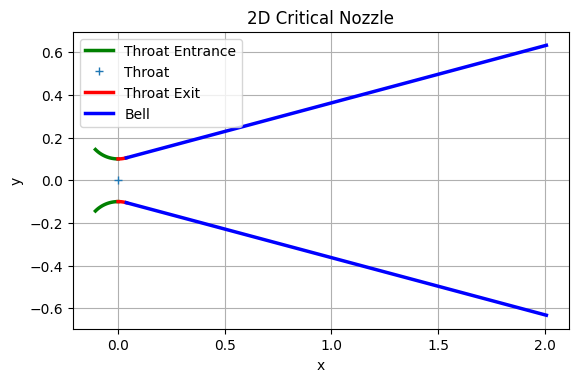

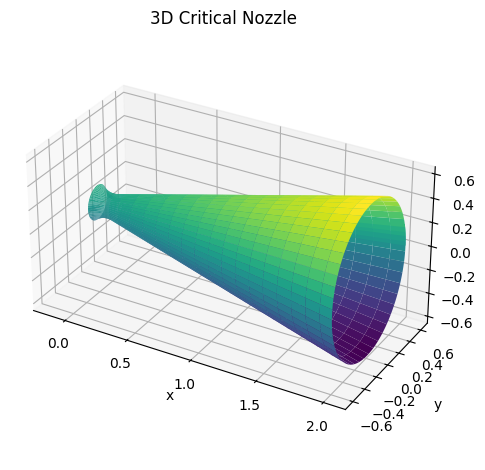

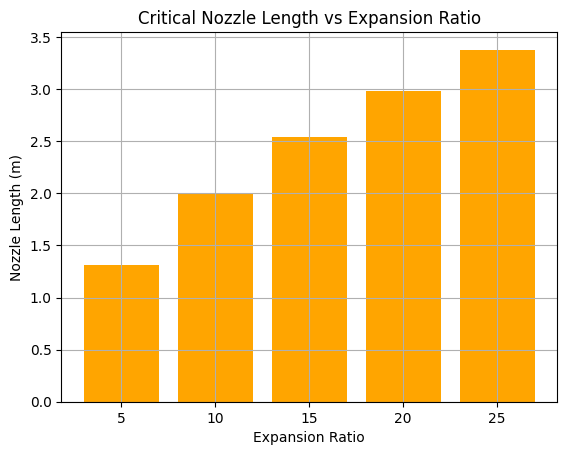

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def size_critical_nozzle(expansion_ratio: float, throat_radius: float, length_percentage=1,
                         critical_half_angle: float = 15, nozzle_arc_scalar: float = 1.5, entrance_angle: float = 135, interval=100):
    """
    Size the critical nozzle based on the parameters and return the coordinates.
    """
    nozzle_arc_radius = nozzle_arc_scalar * throat_radius
    contraction_ratio = (np.sqrt(4 / np.pi * expansion_ratio * np.pi * throat_radius ** 2))**2 / throat_radius ** 2
    nozzle_length = (throat_radius * (np.sqrt(contraction_ratio) - 1) +
                     nozzle_arc_radius * (1 / np.cos(np.deg2rad(critical_half_angle)) - 1)) / \
                    np.tan(np.deg2rad(critical_half_angle)) * length_percentage

    # Throat entrant section
    entrant_angles = np.linspace(np.deg2rad(-90), np.deg2rad(-entrance_angle), interval)
    x_throat_entrant = nozzle_arc_scalar * throat_radius * np.cos(entrant_angles)
    y_throat_entrant = nozzle_arc_scalar * throat_radius * np.sin(entrant_angles) + 2.5 * throat_radius

    # Throat exit section
    exit_angles = np.linspace(np.deg2rad(-90), np.deg2rad(critical_half_angle - 90), interval)
    x_throat_exit = nozzle_arc_scalar * throat_radius * np.cos(exit_angles)
    x_throat_exit = x_throat_exit - x_throat_exit[0]
    y_throat_exit = nozzle_arc_scalar * throat_radius * np.sin(exit_angles) + 2.5 * throat_radius

    # Nozzle section
    slope = np.tan(np.deg2rad(critical_half_angle))
    x_nozzle = np.linspace(x_throat_exit[-1], nozzle_length, interval)
    y_nozzle = slope * (x_nozzle - x_throat_exit[-1]) + y_throat_exit[-1]

    return (x_throat_entrant, y_throat_entrant, -y_throat_entrant,
            x_throat_exit, y_throat_exit, -y_throat_exit,
            x_nozzle, y_nozzle, -y_nozzle), nozzle_length

def plot_critical_nozzle_2D(x_throat_entrant, y_throat_entrant, neg_y_throat_entrant,
                            x_throat_exit, y_throat_exit, neg_y_throat_exit,
                            x_nozzle, y_nozzle, neg_y_nozzle):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    ax.plot(x_throat_entrant, y_throat_entrant, linewidth=2.5, color='green', label='Throat Entrance')
    ax.plot(x_throat_entrant, neg_y_throat_entrant, linewidth=2.5, color='green')
    ax.plot(x_throat_exit[0], 0, '+', label='Throat')
    ax.plot(x_throat_exit, y_throat_exit, linewidth=2.5, color='red', label='Throat Exit')
    ax.plot(x_throat_exit, neg_y_throat_exit, linewidth=2.5, color='red')
    ax.plot(x_nozzle, y_nozzle, linewidth=2.5, color='blue', label='Bell')
    ax.plot(x_nozzle, neg_y_nozzle, linewidth=2.5, color='blue')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('2D Critical Nozzle')
    ax.legend()
    plt.grid(True)
    plt.show()

def plot_critical_nozzle_3D(x_throat_entrant, y_throat_entrant,
                            x_throat_exit, y_throat_exit,
                            x_nozzle, y_nozzle):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([2, 1, 1])

    x_list = np.concatenate((x_throat_entrant[::-1], x_throat_exit, x_nozzle))
    y_list = np.concatenate((y_throat_entrant[::-1], y_throat_exit, y_nozzle))

    Theta = np.linspace(0, 2.1 * np.pi, 1000)
    X, Theta = np.meshgrid(x_list, Theta)
    Y = y_list * np.cos(Theta)
    Z = y_list * np.sin(Theta)

    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('3D Critical Nozzle')
    plt.tight_layout()
    plt.show()

def plot_critical_nozzle_bar():
    """
    Bar plot of expansion ratio vs. nozzle length.
    """
    expansion_ratios = [5, 10, 15, 20, 25]
    lengths = []

    for ratio in expansion_ratios:
        _, nozzle_length = size_critical_nozzle(expansion_ratio=ratio, throat_radius=0.1)
        lengths.append(nozzle_length)

    fig, ax = plt.subplots()
    ax.bar([str(r) for r in expansion_ratios], lengths, color='orange')
    ax.set_xlabel("Expansion Ratio")
    ax.set_ylabel("Nozzle Length (m)")
    ax.set_title("Critical Nozzle Length vs Expansion Ratio")
    plt.grid(True)
    plt.show()

# =============================
# Example usage
# =============================
if __name__ == "__main__":
    nozzle_geometry, _ = size_critical_nozzle(expansion_ratio=10, throat_radius=0.1)
    plot_critical_nozzle_2D(*nozzle_geometry)
    plot_critical_nozzle_3D(nozzle_geometry[0], nozzle_geometry[1], nozzle_geometry[3], nozzle_geometry[4], nozzle_geometry[6], nozzle_geometry[7])
    plot_critical_nozzle_bar()